# Experiments with Five cities dataset
Code found in src/fivecities/experiment.py, including experiments parameters

In [1]:
# Import packages and classes

import sys 
import os
sys.path.append('..')

from tqdm import tqdm

# Import packages
from src.fivecities.experiment import run_experiment, plot_results_timehorizons, plot_results_PTS
from src.fivecities.reader import FiveCities

# Save images
save = True

# Run experiments with each city and time horizon, with various timesteps

In [2]:

# Decide which time horizons and what the timesteps should be per horizon

seqlength_timestep = {
    5 : [1,3],
    #11: [1,6],
    #23: [1,11]
}

# Run experiments for each city with different horizons
results_dict = {}
for city in tqdm(FiveCities.city_list):
    tmp_dict = {}
    for seqlength in seqlength_timestep:
        res = run_experiment(city, seqlength, timestep_list=seqlength_timestep[seqlength], fc_args={'hayashi':False})
        tmp_dict[seqlength] = res
    
    results_dict[city] = tmp_dict

  0%|          | 0/5 [00:04<?, ?it/s]


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: True

## Plot for different time horizons 

100%|██████████| 1/1 [00:02<00:00,  2.17s/it]


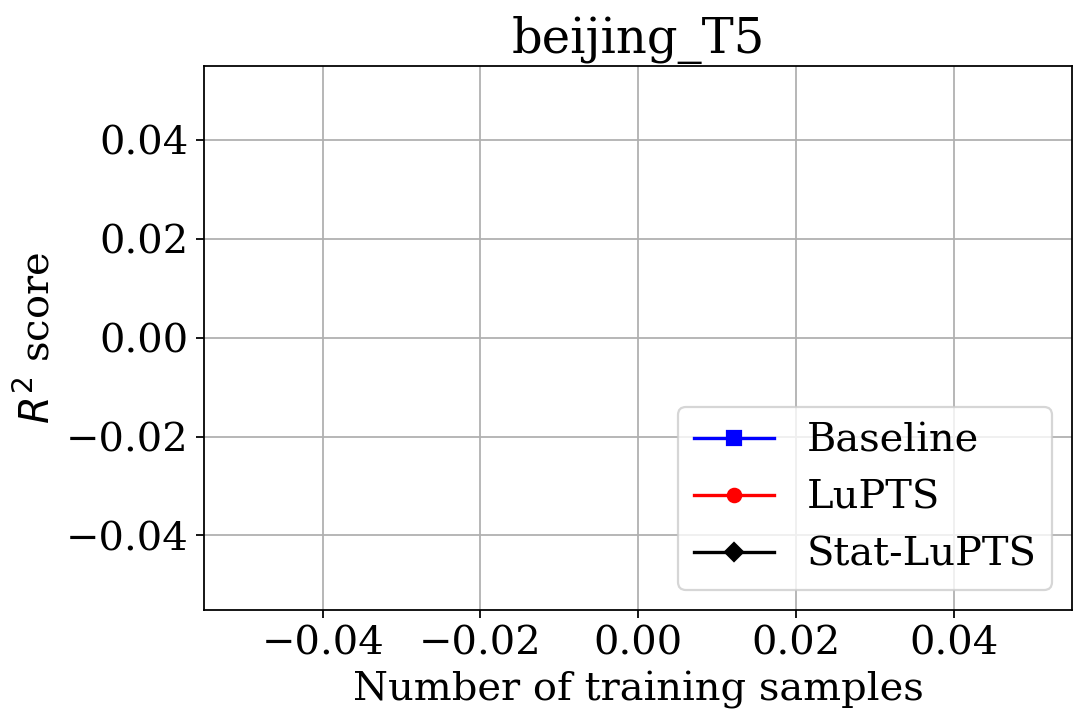

<Figure size 1120x720 with 0 Axes>

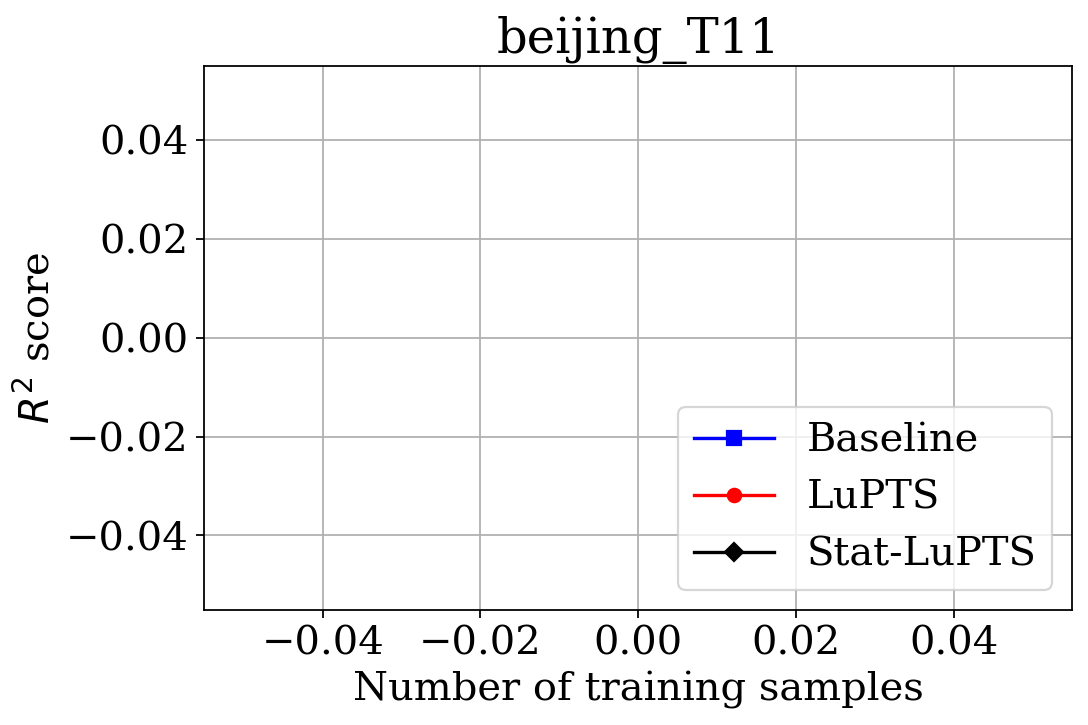

<Figure size 1120x720 with 0 Axes>

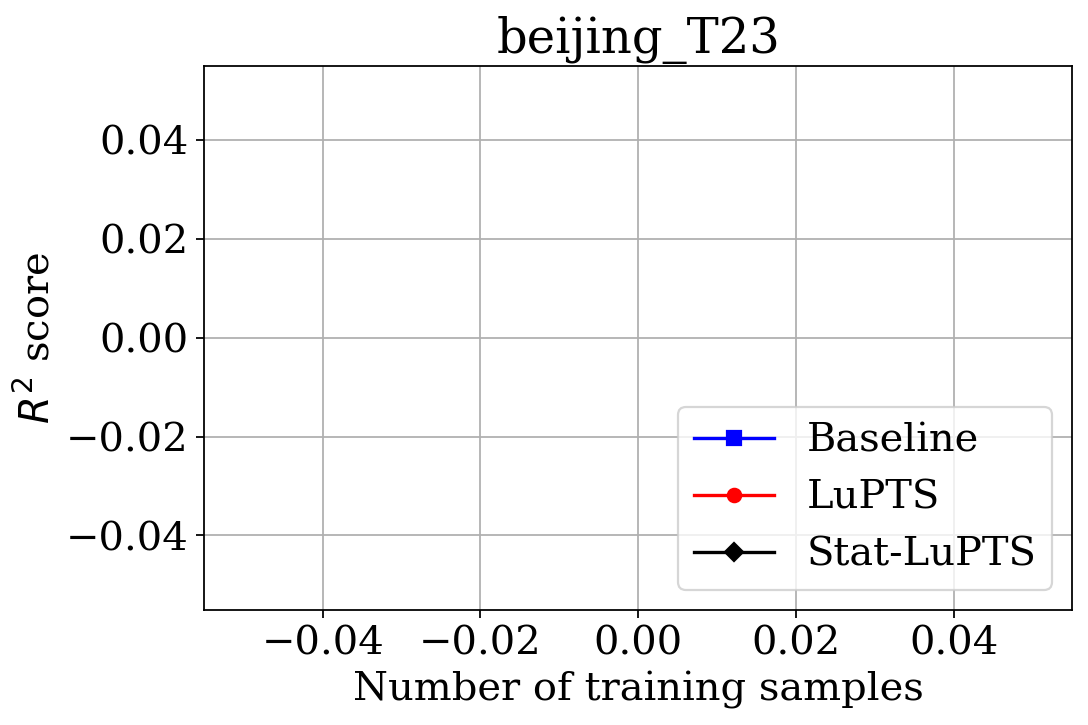

<Figure size 1120x720 with 0 Axes>

In [3]:
for city in tqdm(results_dict):
    for seqlength in seqlength_timestep:
        plot_results_timehorizons(results_dict[city][seqlength], title=f'{city}_T{seqlength}', save=save)

## Plot out the varying privileged time points

100%|██████████| 1/1 [00:03<00:00,  3.24s/it]


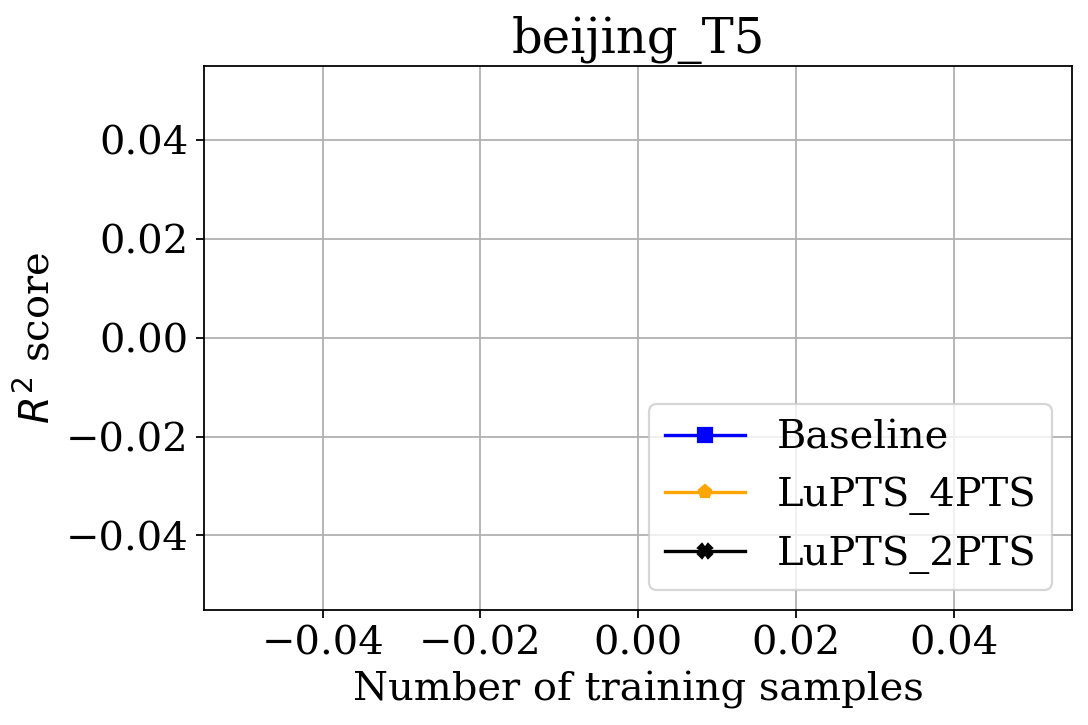

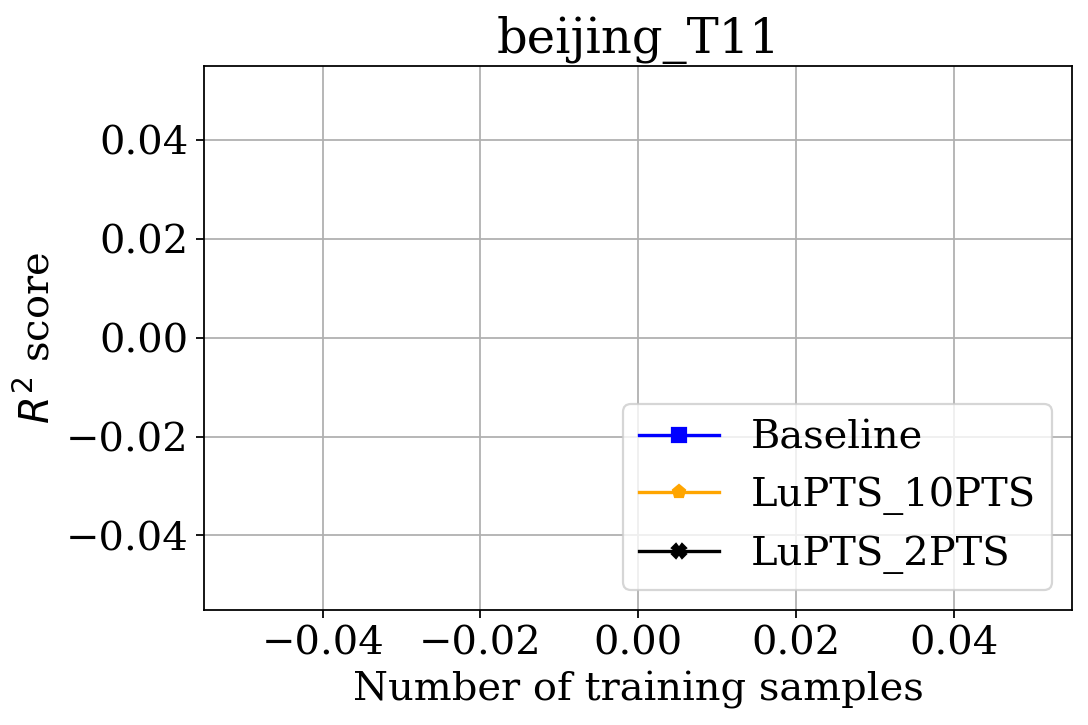

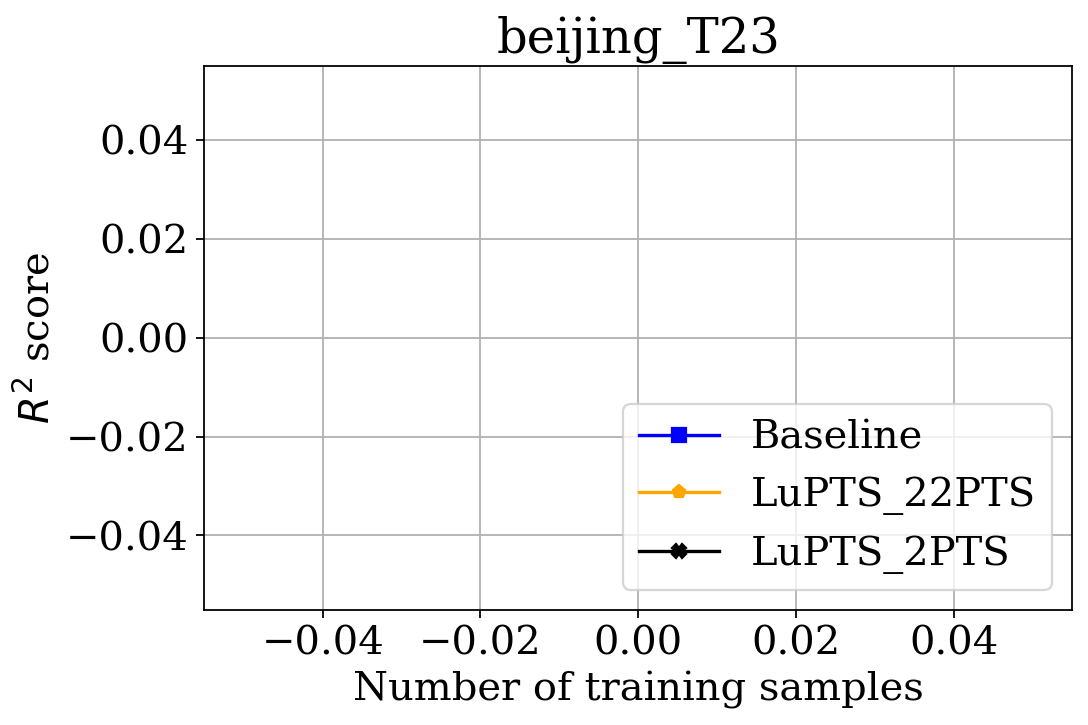

In [4]:
for city in tqdm(results_dict):
    for seqlength in seqlength_timestep:
        plot_results_PTS(results_dict[city][seqlength], title=f'{city}_T{seqlength}', save=save)